## Author: Miral Patel

## Cognorise Infotech Internship April 2024

## Task 3 - Customer Personality Analysis

### Problem Statement:-

Customer Personality Analysis is a detailed analysis of a company’s ideal
customers. It helps a business to better understand its customers and makes it
easier for them to modify products according to the specific needs, behaviors and
concerns of different types of customers. Customer personality analysis helps a business to modify its product based on its
target customers from different types of customer segments. For example, instead
of spending money to market a new product to every customer in the company’s
database, a company can analyze which customer segment is most likely to buy
the product and then market the product only on that particular segment.

### Importing Necessary Libraries

In [1]:
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical computations and handling arrays
import matplotlib.pyplot as plt     # For data visualization
import seaborn as sns               # For enhanced data visualization
from sklearn.model_selection import train_test_split      # For dataset splitting
from datetime import datetime       # For working with dates and times
import warnings
warnings.filterwarnings("ignore")                         # Disable warnings
%matplotlib inline

### Importing The Dataset

In [7]:
df = pd.read_csv("Customer Personality Analysis.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


### Exploratory Data Analysis

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [9]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [10]:
df.shape

(2240, 28)

In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [12]:
df.describe

<bound method NDFrame.describe of          ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0      1826        1970  Graduation       Divorced  $84,835.00         0   
1         1        1961  Graduation         Single  $57,091.00         0   
2     10476        1958  Graduation        Married  $67,267.00         0   
3      1386        1967  Graduation       Together  $32,474.00         1   
4      5371        1989  Graduation         Single  $21,474.00         1   
...     ...         ...         ...            ...          ...      ...   
2235  10142        1976         PhD       Divorced  $66,476.00         0   
2236   5263        1977    2n Cycle        Married  $31,056.00         1   
2237     22        1976  Graduation       Divorced  $46,310.00         1   
2238    528        1978  Graduation        Married  $65,819.00         0   
2239   4070        1969         PhD        Married  $94,871.00         0   

      Teenhome Dt_Customer  Recency  MntWines  ...  N

### Renaming the columns

In [13]:
df.columns = df.columns.str.strip()

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [14]:
df['Income'] = df['Income'].str.strip().str.replace("$",'').str.replace(",",'')

### Changing Data Types

In [15]:
df['Income'] = df['Income'].astype('float')

In [16]:
df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [18]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


### Univariate Analysis - Statistical Non Visual Analysis

In [19]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64','float64'])

In [20]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("."*10,col_name,"."*10)
        print(discrete_data[col_name].agg(['count','unique','nunique']))
        print("value_counts:\n",discrete_data[col_name].value_counts())
        print()

In [21]:
discrete_univariate_analysis(discrete_df)

.......... Education ..........
count                                            2240
unique     [Graduation, PhD, 2n Cycle, Master, Basic]
nunique                                             5
Name: Education, dtype: object
value_counts:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

.......... Marital_Status ..........
count                                                   2240
unique     [Divorced, Single, Married, Together, Widow, Y...
nunique                                                    8
Name: Marital_Status, dtype: object
value_counts:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

.......... Country ..........
count                                     2240
unique     [SP, CA, US, AUS, GER, IND, SA, ME]
nunique                                      8
Name: Country, d

In [22]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("."*10,col_name,"."*10)
        print(numerical_data[col_name].agg(['min','max','mean','median','std']))
        print()

In [23]:
numerical_univariate_analysis(numerical_df)

.......... ID ..........
min           0.000000
max       11191.000000
mean       5592.159821
median     5458.500000
std        3246.662198
Name: ID, dtype: float64

.......... Year_Birth ..........
min       1893.000000
max       1996.000000
mean      1968.805804
median    1970.000000
std         11.984069
Name: Year_Birth, dtype: float64

.......... Income ..........
min         1730.000000
max       666666.000000
mean       52247.251354
median     51381.500000
std        25173.076661
Name: Income, dtype: float64

.......... Kidhome ..........
min       0.000000
max       2.000000
mean      0.444196
median    0.000000
std       0.538398
Name: Kidhome, dtype: float64

.......... Teenhome ..........
min       0.000000
max       2.000000
mean      0.506250
median    0.000000
std       0.544538
Name: Teenhome, dtype: float64

.......... Recency ..........
min        0.000000
max       99.000000
mean      49.109375
median    49.000000
std       28.962453
Name: Recency, dtype: float64

...

In [24]:
discrete_df.columns

Index(['Education', 'Marital_Status', 'Country'], dtype='object')

In [25]:
numerical_df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
      dtype='object')

In [26]:
discrete_num_cols = ['ID', 'Year_Birth', 'Kidhome', 'Teenhome',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                   'Response', 'Complain']
numerical_df.drop(columns=discrete_num_cols, axis=1, inplace=True)

print('Shape:', numerical_df.shape)
print('Columns:', numerical_df.columns)

Shape: (2240, 8)
Columns: Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
      dtype='object')


In [27]:
discrete_num_df = df[discrete_num_cols]

discrete_num_df.shape
discrete_num_df.columns

Index(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
      dtype='object')

In [28]:
discrete_num_df.drop(columns=['ID'],axis=1,inplace=True)

discrete_num_df.columns

Index(['Year_Birth', 'Kidhome', 'Teenhome', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
      dtype='object')

In [29]:
discrete_univariate_analysis(discrete_df)

.......... Education ..........
count                                            2240
unique     [Graduation, PhD, 2n Cycle, Master, Basic]
nunique                                             5
Name: Education, dtype: object
value_counts:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

.......... Marital_Status ..........
count                                                   2240
unique     [Divorced, Single, Married, Together, Widow, Y...
nunique                                                    8
Name: Marital_Status, dtype: object
value_counts:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

.......... Country ..........
count                                     2240
unique     [SP, CA, US, AUS, GER, IND, SA, ME]
nunique                                      8
Name: Country, d

In [30]:
numerical_univariate_analysis(numerical_df)

.......... Income ..........
min         1730.000000
max       666666.000000
mean       52247.251354
median     51381.500000
std        25173.076661
Name: Income, dtype: float64

.......... Recency ..........
min        0.000000
max       99.000000
mean      49.109375
median    49.000000
std       28.962453
Name: Recency, dtype: float64

.......... MntWines ..........
min          0.000000
max       1493.000000
mean       303.935714
median     173.500000
std        336.597393
Name: MntWines, dtype: float64

.......... MntFruits ..........
min         0.000000
max       199.000000
mean       26.302232
median      8.000000
std        39.773434
Name: MntFruits, dtype: float64

.......... MntMeatProducts ..........
min          0.000000
max       1725.000000
mean       166.950000
median      67.000000
std        225.715373
Name: MntMeatProducts, dtype: float64

.......... MntFishProducts ..........
min         0.000000
max       259.000000
mean       37.525446
median     12.000000
std     

In [31]:
discrete_univariate_analysis(discrete_num_df)

.......... Year_Birth ..........
count                                                   2240
unique     [1970, 1961, 1958, 1967, 1989, 1954, 1947, 197...
nunique                                                   59
Name: Year_Birth, dtype: object
value_counts:
 Year_Birth
1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1965    74
1973    74
1969    71
1974    69
1956    55
1979    53
1958    53
1952    52
1977    52
1959    51
1968    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     7
1993     5
1995     5
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
1900     1
Name: count, dtype: int64

.......... Kidhome ..........
count           2240

In [32]:
df[discrete_num_cols] = df[discrete_num_cols].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   object        
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   object        
 6   Teenhome             2240 non-null   object        
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [33]:
df = df.dropna(subset=['Income'])

In [34]:
df.shape

(2216, 28)

In [35]:
cols = ['Year_Birth' , 'Education', 'Marital_Status', 'Income','Dt_Customer', 'MntWines']

df = df.drop_duplicates(subset=cols)

df.shape

(2015, 28)

### Univariate - Visual Analysis

Income                 Axes(0.125,0.712609;0.352273x0.167391)
Recency             Axes(0.547727,0.712609;0.352273x0.167391)
MntWines               Axes(0.125,0.511739;0.352273x0.167391)
MntFruits           Axes(0.547727,0.511739;0.352273x0.167391)
MntMeatProducts         Axes(0.125,0.31087;0.352273x0.167391)
MntFishProducts      Axes(0.547727,0.31087;0.352273x0.167391)
MntSweetProducts           Axes(0.125,0.11;0.352273x0.167391)
MntGoldProds            Axes(0.547727,0.11;0.352273x0.167391)
dtype: object

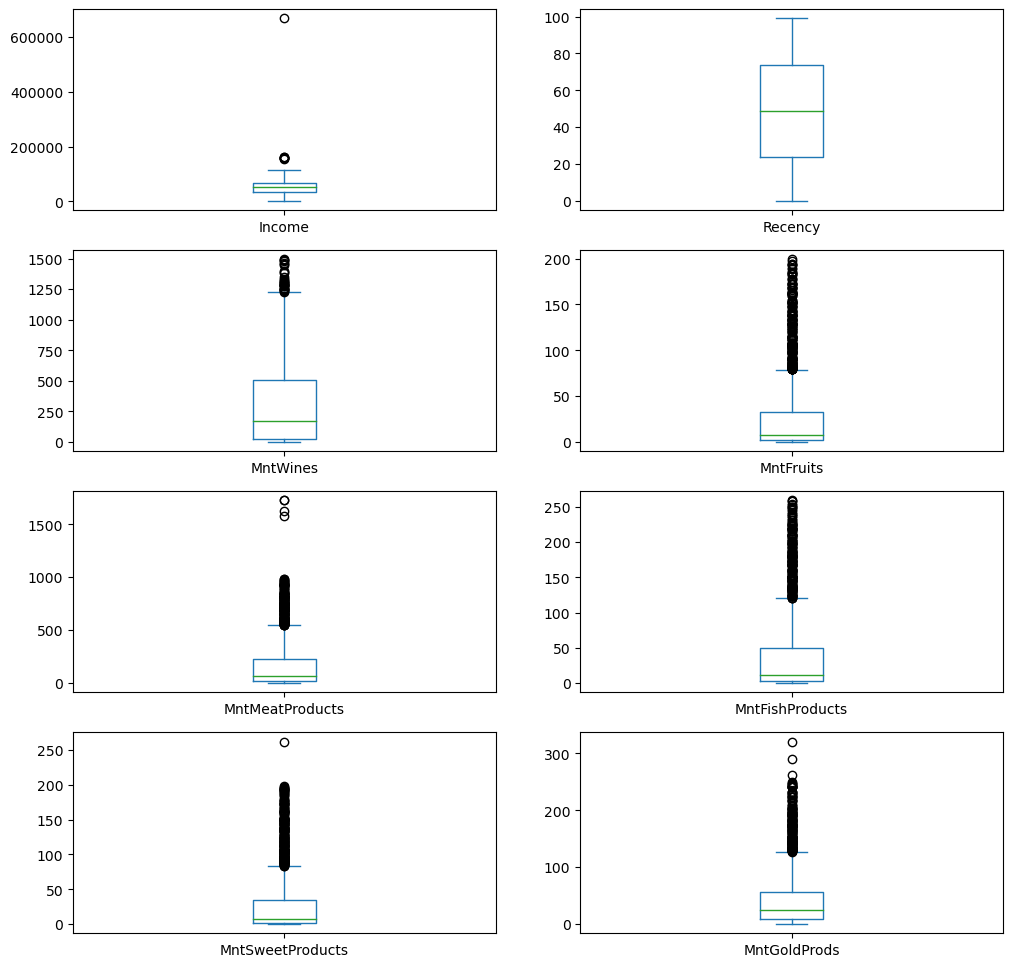

In [37]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(12, 12))

<Axes: xlabel='Country'>

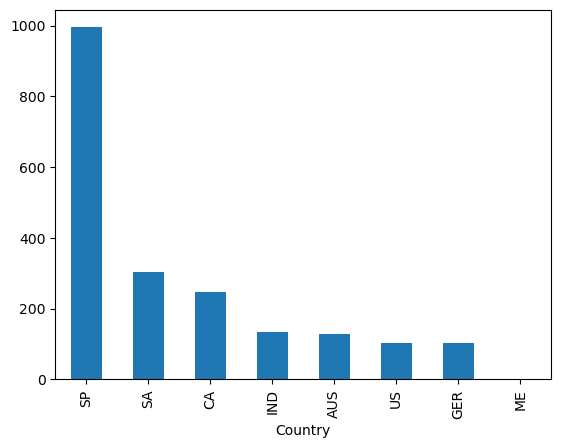

In [38]:
df['Country'].value_counts().plot(kind='bar')

<Axes: xlabel='AcceptedCmp1'>

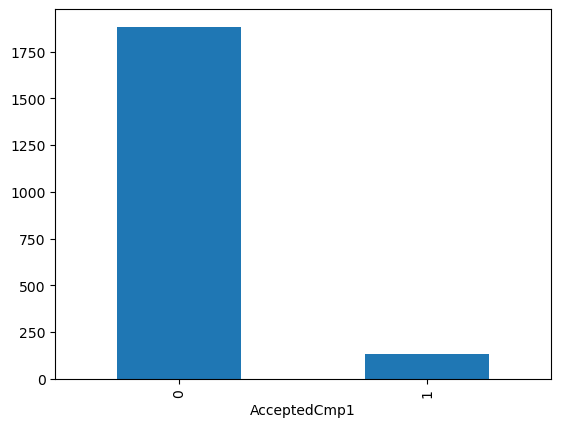

In [39]:
df['AcceptedCmp1'].value_counts().plot(kind='bar')

<Axes: xlabel='AcceptedCmp2'>

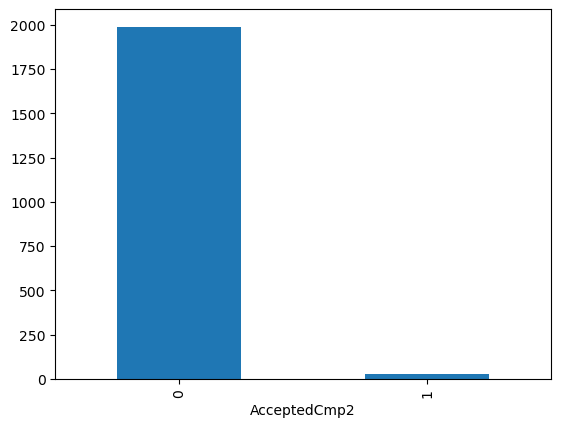

In [40]:
df['AcceptedCmp2'].value_counts().plot(kind='bar')

<Axes: xlabel='AcceptedCmp3'>

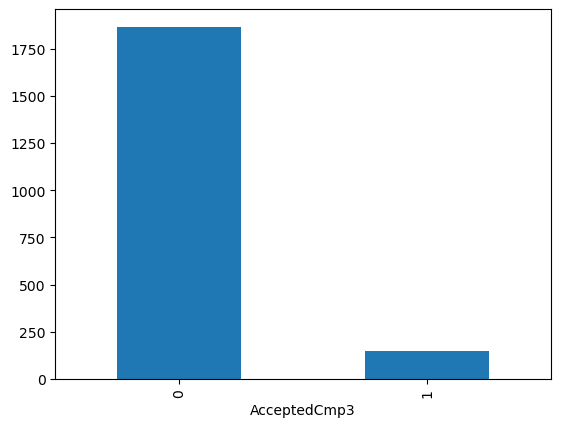

In [41]:
df['AcceptedCmp3'].value_counts().plot(kind='bar')

<Axes: xlabel='AcceptedCmp4'>

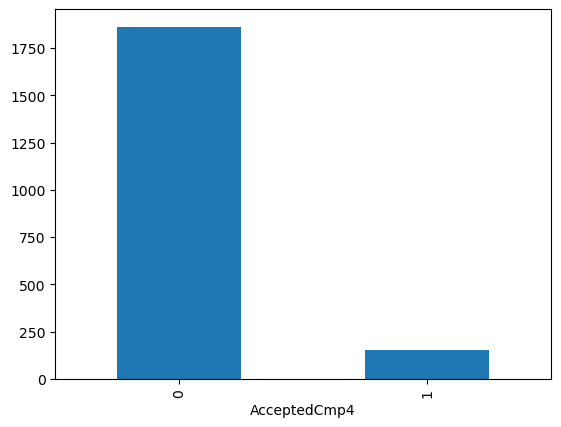

In [42]:
df['AcceptedCmp4'].value_counts().plot(kind='bar')

<Axes: xlabel='AcceptedCmp5'>

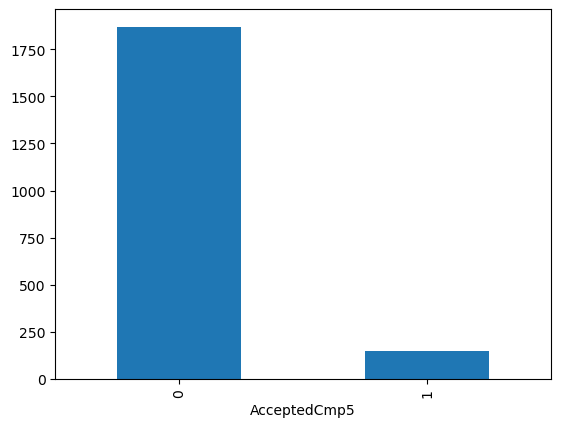

In [43]:
df['AcceptedCmp5'].value_counts().plot(kind='bar')

<Axes: xlabel='Response'>

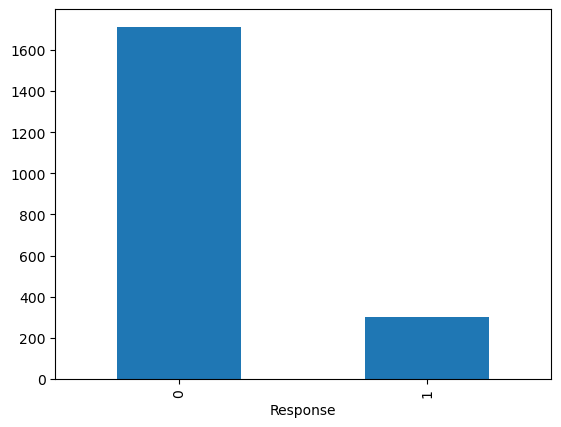

In [44]:
df['Response'].value_counts().plot(kind='bar')

### Removing the outliers

In [45]:
df = df.loc[df['Income'] < 100000]

df.shape

(2002, 28)

In [46]:
df = df.loc[(df['MntMeatProducts'] < 1000)]

df.shape

(2001, 28)

In [47]:
df = df.loc[(df['MntSweetProducts'] < 200)]

df.shape

(2001, 28)

In [48]:
df = df.loc[(df['MntGoldProds'] < 250)]

df.shape

(1998, 28)

In [49]:
df = df.loc[(df['MntFishProducts'] < 250)]

df.shape

(1990, 28)

In [50]:
df = df.loc[(df['MntWines'] < 1500)]

df.shape

(1990, 28)

In [51]:
df = df.loc[(df['MntFruits'] < 200)]

df.shape

(1990, 28)

### Bivariate Analysis

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1990 non-null   object        
 1   Year_Birth           1990 non-null   object        
 2   Education            1990 non-null   object        
 3   Marital_Status       1990 non-null   object        
 4   Income               1990 non-null   float64       
 5   Kidhome              1990 non-null   object        
 6   Teenhome             1990 non-null   object        
 7   Dt_Customer          1990 non-null   datetime64[ns]
 8   Recency              1990 non-null   int64         
 9   MntWines             1990 non-null   int64         
 10  MntFruits            1990 non-null   int64         
 11  MntMeatProducts      1990 non-null   int64         
 12  MntFishProducts      1990 non-null   int64         
 13  MntSweetProducts     1990 non-null   i

### Income vs Products

<Axes: xlabel='Income', ylabel='MntWines'>

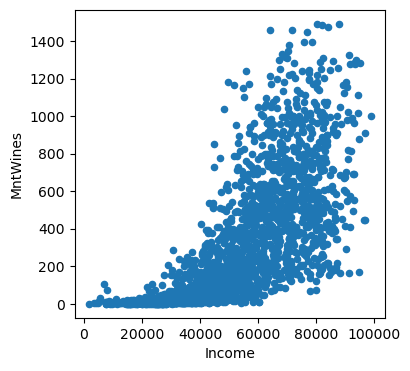

In [54]:
df.plot(kind='scatter', x='Income', y='MntWines', figsize=(4, 4))

<Axes: xlabel='Income', ylabel='MntFruits'>

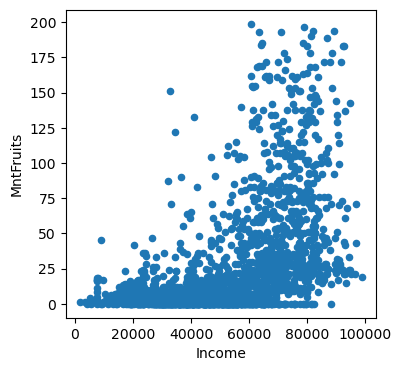

In [55]:
df.plot(kind='scatter', x='Income', y='MntFruits', figsize=(4, 4))

<Axes: xlabel='Income', ylabel='MntMeatProducts'>

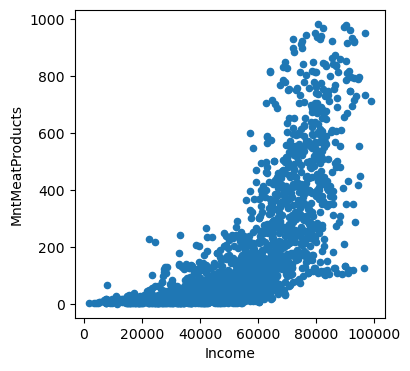

In [56]:
df.plot(kind='scatter', x='Income', y='MntMeatProducts', figsize=(4, 4))

<Axes: xlabel='Income', ylabel='MntGoldProds'>

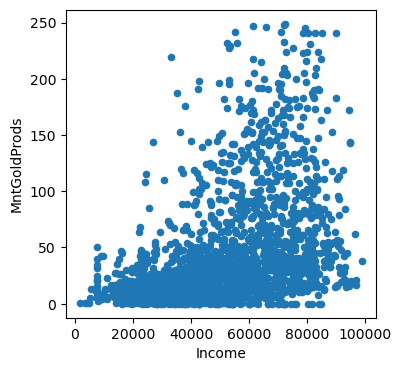

In [57]:
df.plot(kind='scatter', x='Income', y='MntGoldProds', figsize=(4, 4))

<Axes: xlabel='Income', ylabel='MntSweetProducts'>

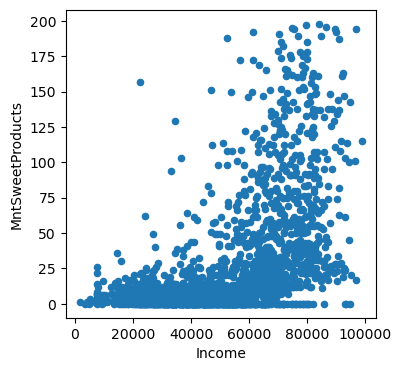

In [58]:
df.plot(kind='scatter', x='Income', y='MntSweetProducts', figsize=(4, 4))

<Axes: xlabel='Income', ylabel='MntFishProducts'>

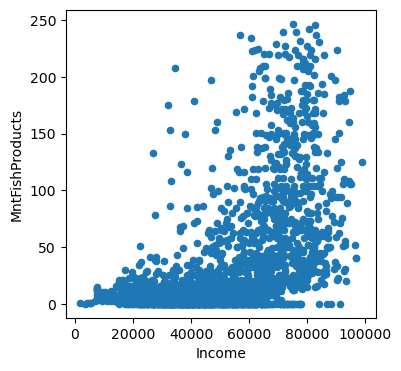

In [59]:
df.plot(kind='scatter', x='Income', y='MntFishProducts', figsize=(4, 4))

In [60]:
Products = df.columns.str.startswith("Mnt")

In [61]:
group = df.groupby('Kidhome')

group['MntFruits'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Kidhome,,,,
0,0,199,39.324891,22.0
1,0,161,8.606965,3.0
2,0,123,6.634146,1.0


<Axes: title={'center': 'MntFruits'}, xlabel='Teenhome'>

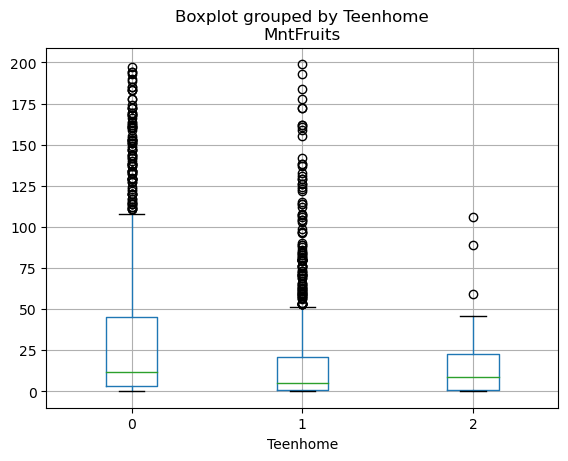

In [62]:
df.boxplot(by='Teenhome', column='MntFruits')

<Axes: title={'center': 'MntSweetProducts'}, xlabel='Kidhome'>

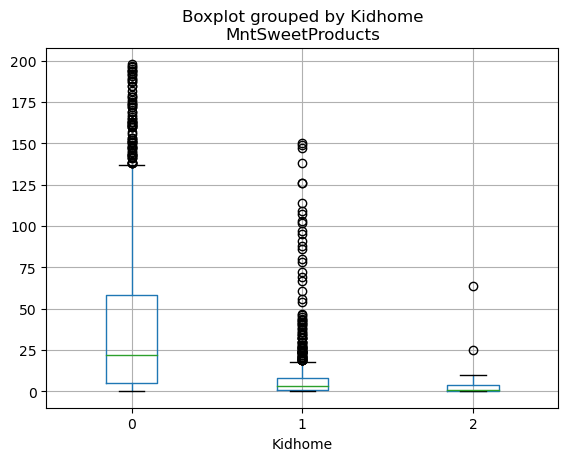

In [63]:
df.boxplot(by='Kidhome', column='MntSweetProducts')

### Income vs Num Of Deal Purchases

<Axes: title={'center': 'Income'}, xlabel='NumDealsPurchases'>

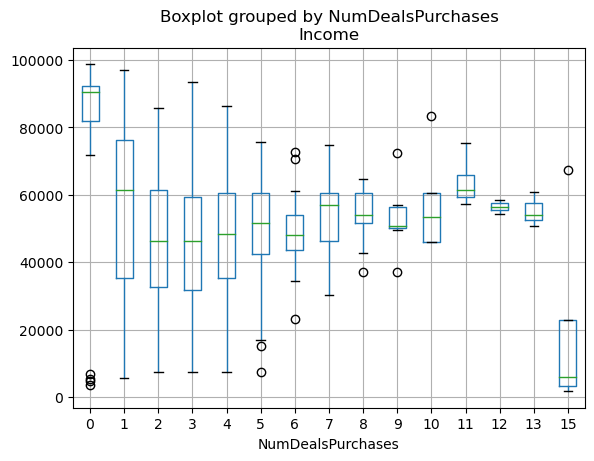

In [64]:
df.boxplot( column= 'Income', by='NumDealsPurchases' )

### Kidhome Vs Web, Store, Catalog Purchases

<Axes: title={'center': 'NumWebPurchases'}, xlabel='Kidhome'>

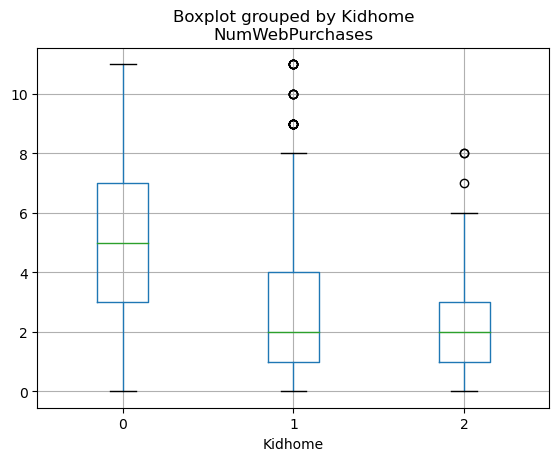

In [65]:
df.boxplot( by= 'Kidhome', column='NumWebPurchases' )

<Axes: title={'center': 'NumCatalogPurchases'}, xlabel='Kidhome'>

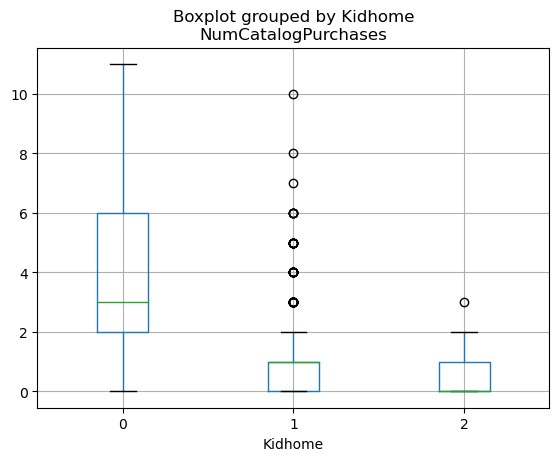

In [66]:
df.boxplot( by= 'Kidhome', column='NumCatalogPurchases' )

<Axes: title={'center': 'NumStorePurchases'}, xlabel='Kidhome'>

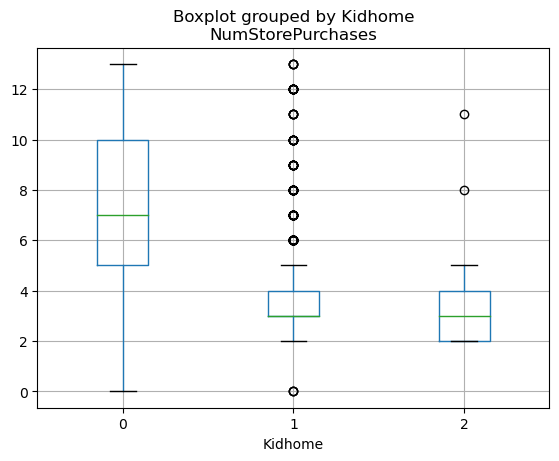

In [67]:
df.boxplot( by= 'Kidhome', column='NumStorePurchases' )

### Education Vs Campaign Accepted 

In [68]:
a = ['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

df['accepted_campaign'] = df[a].sum(axis=1)

In [69]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,accepted_campaign
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,2


In [70]:
df['campaign_accepted'] = np.where(df['accepted_campaign'] > 0, 1, 0)

In [71]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,accepted_campaign,campaign_accepted
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,1,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,2,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,2,1


In [72]:
df['campaign_accepted'].dtype

dtype('int32')

<Axes: xlabel='Education'>

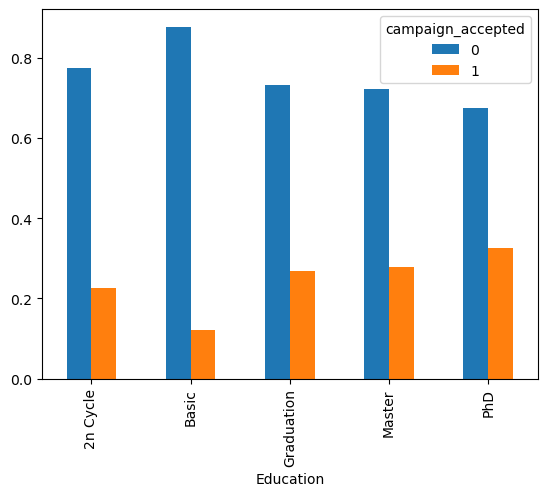

In [73]:
tab = pd.crosstab(df['Education'], df['campaign_accepted'], normalize='index')

tab.plot(kind='bar')

In [74]:
tab

campaign_accepted,0,1
Education,,
2n Cycle,0.773481,0.226519
Basic,0.877551,0.122449
Graduation,0.732535,0.267465
Master,0.722561,0.277439
PhD,0.674419,0.325581


### Income Vs Campaign Accepted

<Axes: title={'center': 'Income'}, xlabel='campaign_accepted'>

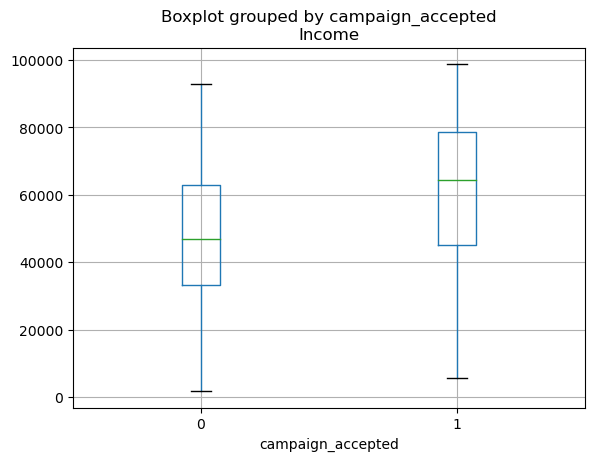

In [75]:
df.boxplot(by='campaign_accepted', column='Income')

### Insights From The Project:

1. Most of the customers are from country SP
2. There are many outliers in the dataset. For efficient analysis, the outliers are removed.
3. Customers with higher income are purchasing more wines, meat and fish products comparing to lower income customers.
4. Customers with teen at home are buying less fruits and customers with kid at home are buying less sweet products.
5. Customers with relatively higher incomes are less inclined towards discounts.
6. The last campaign i.e., Response is the most successful campaign out of all the campaigns conducted.
7. Least number of people i.e., 30 responded to the second campaign AcceptedCmp2.

## Task Completed By Miral Patel

## Thankyou